PROJECT: Heart Disease Prediction

Problem Statement:

You are the data scientist at a medical research facility. The facility wants you to build a machine learning model to classify if the given data of a patient should tell if the patient is at the risk of a heart attack.

Tasks To Be Performed:
Data Analysis:
a. Import the dataset

b. Get information about the dataset (mean, max, min, quartiles etc.)

c. Find the correlation between all fields

In [19]:
# importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [53]:
# Checking the first few rows and dimension of the dataset
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))
print('Shape of Data is ',df.shape)
df.tail()

Shape of Data is  (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [20]:
#information about the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [21]:
#Find the correlation between all fields
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


2. Data Visualization:

a. Visualize the number of patients having a heart disease and not having a heart disease

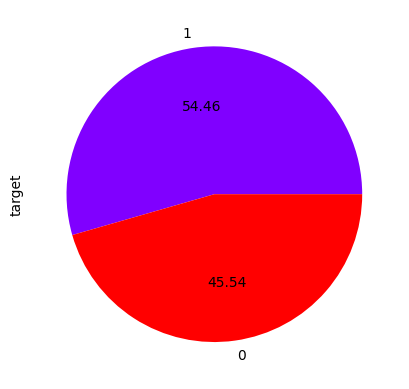

In [59]:
# number of patients having a heart disease and not having a heart disease
df['target'].value_counts().plot(kind='pie',autopct='%0.2f',cmap='rainbow');

Visualize the age and whether a patient has disease or not

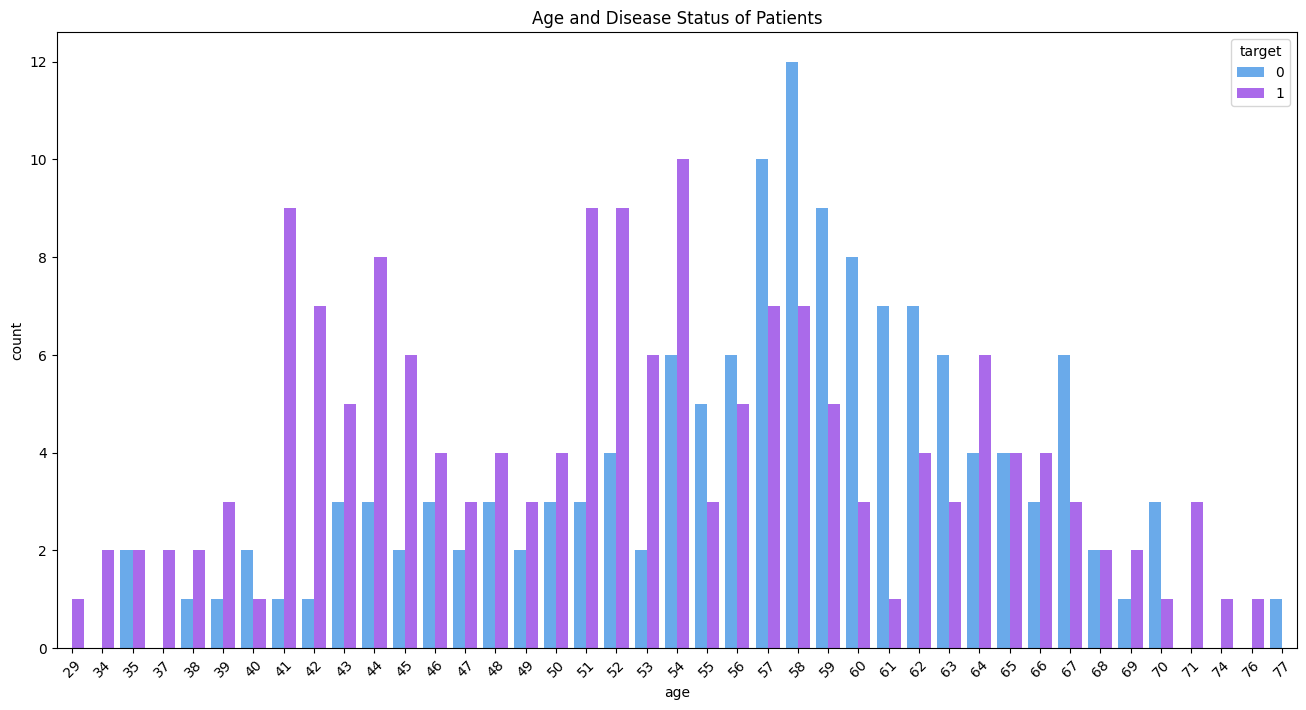

In [57]:
plt.figure(figsize=(16,8))
sns.countplot(x='age',data=df,hue='target',palette='cool')
plt.xticks(rotation=45)
plt.title("Age and Disease Status of Patients")
plt.show()

Visualize correlation between all features using a heat map

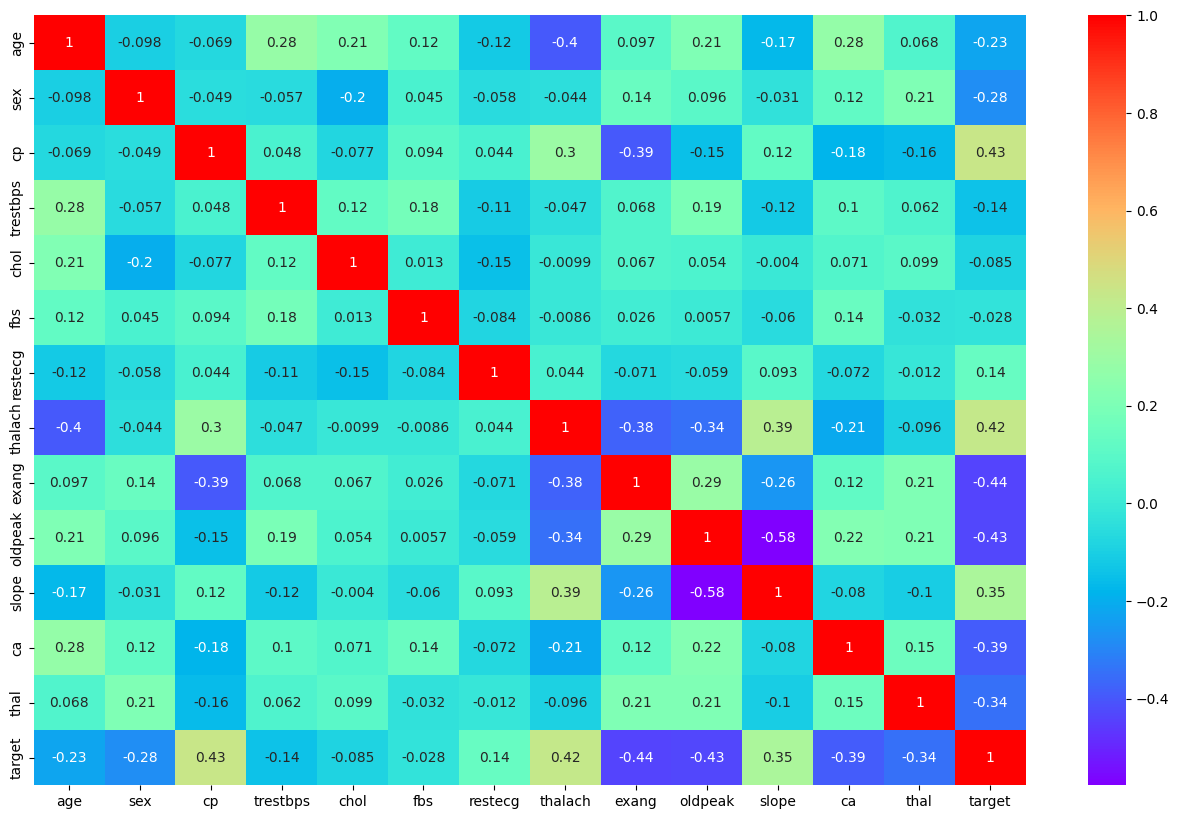

In [54]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),cmap='rainbow',annot=True);

3. Logistic Regression:

a. Build a simple logistic regression model:

i. Divide the dataset in 70:30 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and get the accuracy score

In [60]:
x = df.drop(columns=['target'])
y = df['target']

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import*
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [89]:
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('Accuracy of LogisticRegression Model is',accuracy_score(y_test,y_pred)*100)

Confusion Matrix
[[32  9]
 [ 8 42]]
Accuracy of LogisticRegression Model is 81.31868131868131


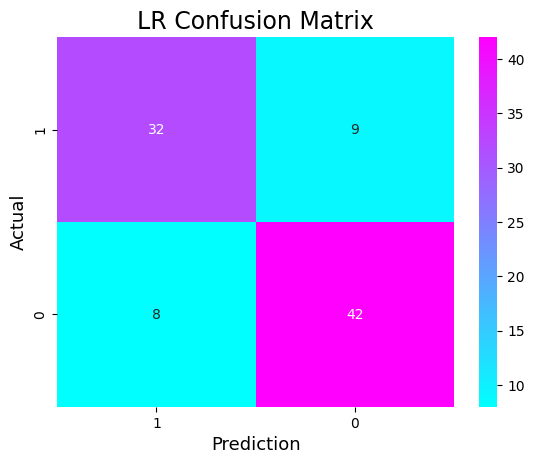

In [64]:
cm = confusion_matrix(y_test,y_pred)

#Plot the confusion matrix.
sns.heatmap(cm,annot=True,xticklabels=['1','0'],yticklabels=['1','0'],cmap='cool')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('LR Confusion Matrix',fontsize=17)
plt.show()

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



 Decision Tree:

a. Build a decision tree model:

i. Divide the dataset in 70:30 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and calculate the accuracy

iv. Visualize the decision tree using the Graphviz package

In [14]:
!pip install graphviz

In [15]:
!pip install pydotplus

In [70]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3) #max_depth is maximum number of levels in the tree
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [88]:
predictions = clf.predict(x_test)
print('Confusion Matrix')
print(confusion_matrix(y_test,predictions))
print('Accuracy of DecisionTreeClassifier Model is',accuracy_score(y_test,predictions)*100)

Confusion Matrix
[[32  9]
 [12 38]]
Accuracy of DecisionTreeClassifier Model is 76.92307692307693


In [80]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75        41
           1       0.81      0.76      0.78        50

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91



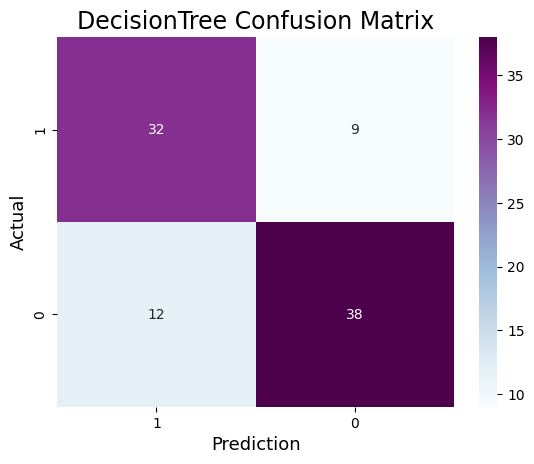

In [84]:
cm = confusion_matrix(y_test,predictions)

#Plot the confusion matrix.
sns.heatmap(cm,annot=True,xticklabels=['1','0'],yticklabels=['1','0'],cmap='BuPu')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('DecisionTree Confusion Matrix',fontsize=17)
plt.show()

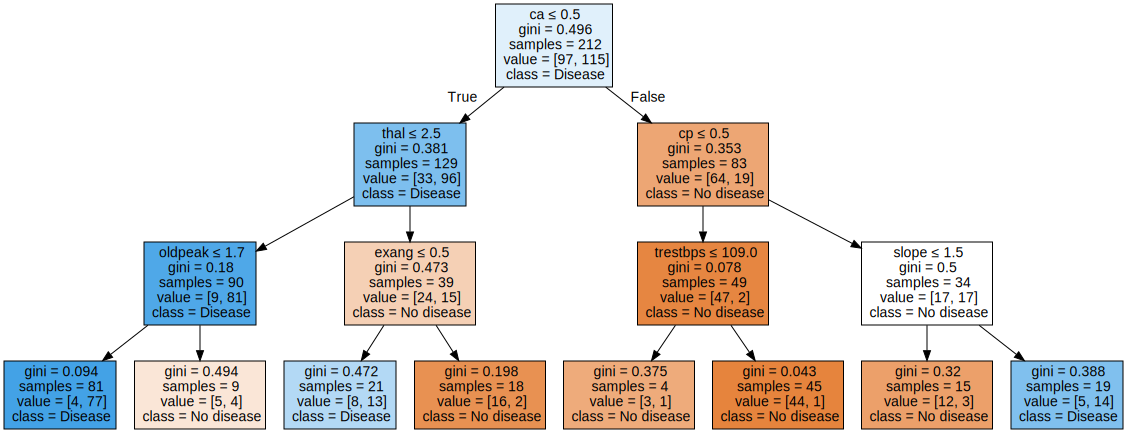

In [75]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file="clf.dot", class_names=['No disease', 'Disease'],feature_names=x.columns, filled=True, special_characters=True)

import graphviz
with open("clf.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Random Forest:

a. Build a Random Forest model:

i. Divide the dataset in 70:30 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and calculate the accuracy

iv. Visualize the model using  the Graphviz package

In [107]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(rfc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=7,
                                              min_samples_split=5),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [108]:
rfc = grid_search.best_estimator_
rfc

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

In [113]:
 from sklearn.ensemble import RandomForestClassifier
 rfc = RandomForestClassifier(n_estimators=300,max_depth=5, min_samples_leaf=2, min_samples_split=5)
 rfc.fit(x_train,y_train)
 pred = rfc.predict(x_test)
 print('Confusion Matrix')
print(confusion_matrix(y_test,pred))
print('Accuracy of RandomForestClassifier Model is',accuracy_score(y_test,pred)*100)

Confusion Matrix
[[32  9]
 [ 7 43]]
Accuracy of RandomForestClassifier Model is 82.41758241758241


In [114]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.83      0.86      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



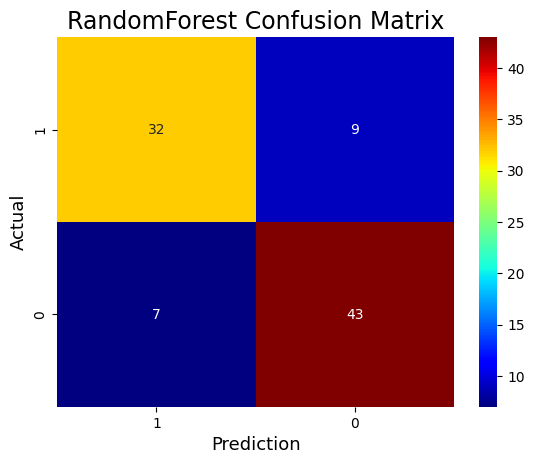

In [115]:
cm = confusion_matrix(y_test,pred)

#Plot the confusion matrix.
sns.heatmap(cm,annot=True,xticklabels=['1','0'],yticklabels=['1','0'],cmap='jet')
plt.xlabel('Prediction',fontsize=13)
plt.ylabel('Actual',fontsize=13)
plt.title('RandomForest Confusion Matrix',fontsize=17)
plt.show()

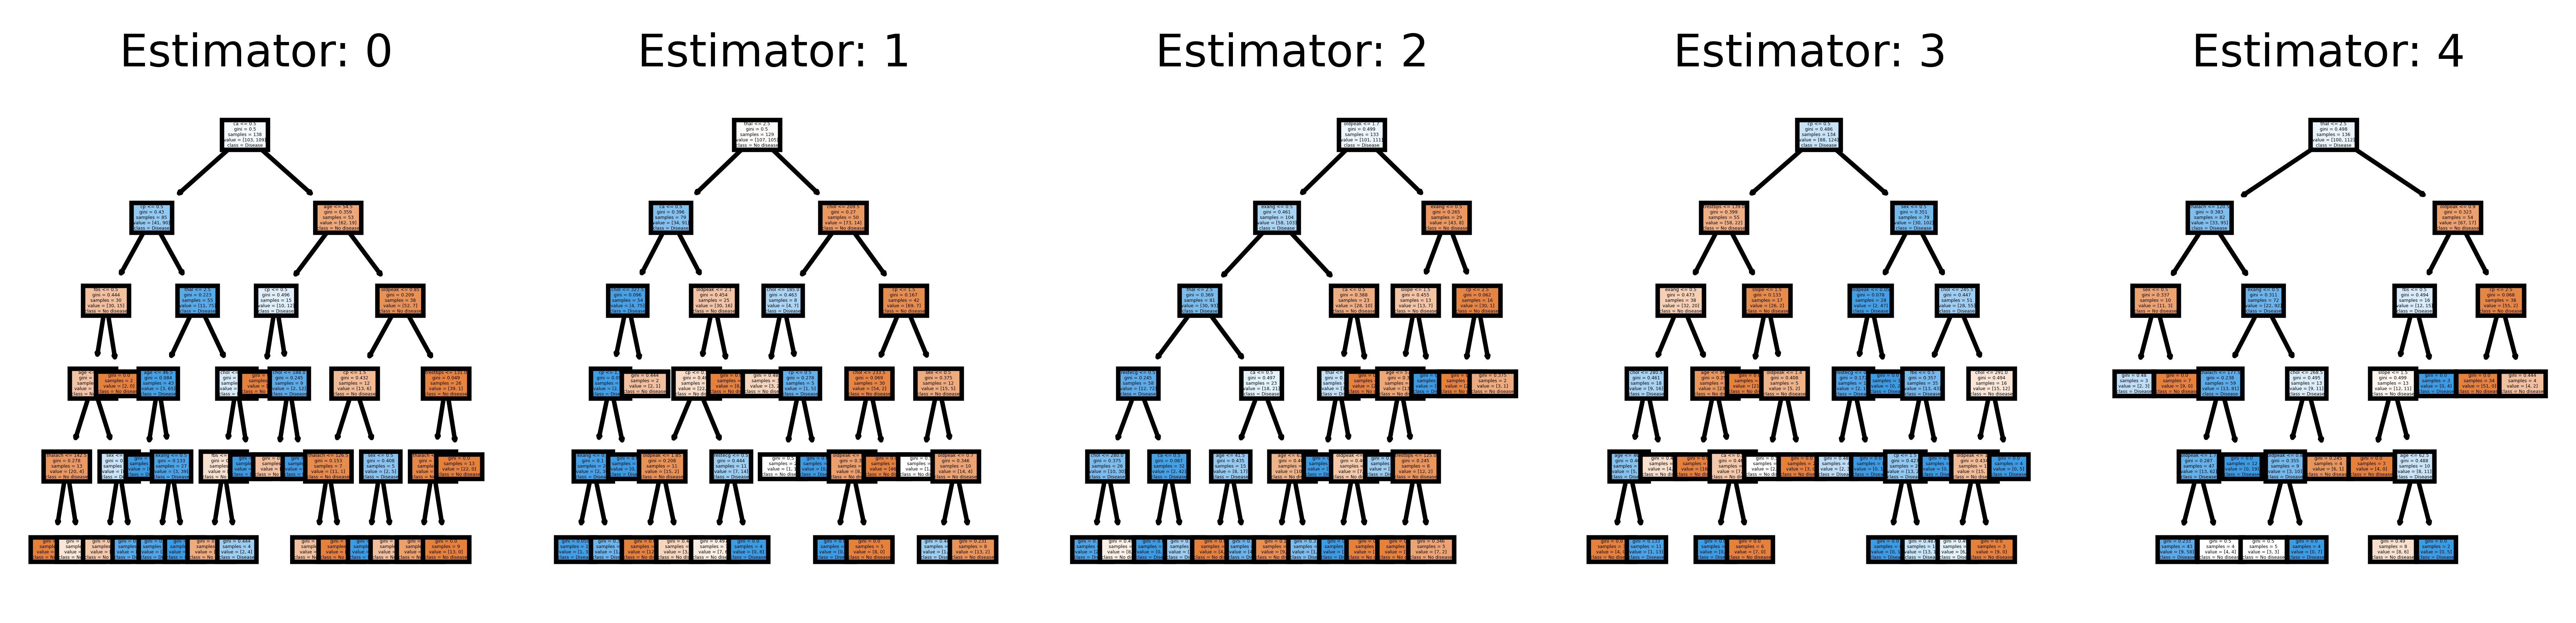

In [118]:
# This may not the best way to view each estimator as it is small

fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=900)
for index in range(0, 5):
    tree.plot_tree(rfc.estimators_[index],class_names=['No disease', 'Disease'],feature_names=x.columns,filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 10)
fig.savefig('rf_5trees.png')

In [124]:
print('Accuracy of LogisticRegression Model : ',accuracy_score(y_test,y_pred)*100)
print('Accuracy of DecisionTreeClassifier Model : ',accuracy_score(y_test,predictions)*100)
print('Accuracy of RandomForestClassifier Model : ',accuracy_score(y_test,pred)*100)


Accuracy of LogisticRegression Model :  81.31868131868131
Accuracy of DecisionTreeClassifier Model :  76.92307692307693
Accuracy of RandomForestClassifier Model :  82.41758241758241


-->in terms of accuracy,RandomForest classifier model gives maximum accuracy so it is the best model.